## 군집
* 각 군집화 기법은 나름의 장단점을 가지고 있으며 군집화하려는 데이터의 특성에 맞게 수행해야 함
* K-평균의 경우 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행. 매우 직관적인 알고리즘으로 많은 군집화 애플리케이션에 애용되지만 복잡한 구조를 가지는 데이터세트에 적용하기에는 한계가 있음. 평가는 실루엣 계수를 이용
* 평균이동(Mean Shift)은 K-평균과 유사하나 거리 중심이 아니고 데이터가 모여있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행. 컴퓨터 비전 영역에서 이미지나 영상 데이터의 특정 개체 구분에 적합한 알고리즘
* GMM(Gausian Mixture Model)은 군집화를 적용하고자 하는 데이터를 여러 개의 가우시안 분포 모델을 섞어서 생성된 모델로 가정해 수행하는 방식. K-평균 보다 유연하고 다양한 데이터 세트에 잘 적용될 수 있으나 수행 시간이 오래 걸림
* DBSCAN(Density Based Spatial Clustering of Applications with Noise)은 밀도 기반 군집화의 대표적인 알고리즘으로 데이터의 분포가 기하학적으로 복잡한 데이터 세트에 효과적인 군집화가 가능함

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepla_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepla_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0) # kmeans 객체 만들고
kmeans.fit(irisDF) 
#객체에 fit() 수행 -> irisDF 데이터에 대한 군집화 수행 결과가 kmeans 객체변수로 반환

KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)
# label_ : 각 데이터 포인트가 속한 군집 중심점 레이블
# 값이 0,1,2 -> 각 레코드가 군집 1,2,3에 속함을 의미

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
irisDF['target']= iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)
# 'target'과 'cluster' 열을 기준으로 그룹화한 후, 'sepal_length' 열의 개수를 집계합니다.
# 이를 통해 각 타겟과 군집 조합에 대해 'sepal_length' 열 값의 개수를 구할 수 있습니다.

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [6]:
# 시각화
from sklearn.decomposition import PCA

# 차원축소 (속성4개인데 2차원평면에 적합하지 않아 속성을 2개로 차원축소 함.)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepla_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


In [7]:
pca_transformed
# pca_transformed은 iris.data를 PCA를 통해 2차원으로 축소한 결과를 나타내는 배열입니다. 
# 각 행은 원래 데이터 포인트에 대응하며, 첫 번째 열은 첫 번째 주성분의 값, 
# 두 번째 열은 두 번째 주성분의 값입니다.

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

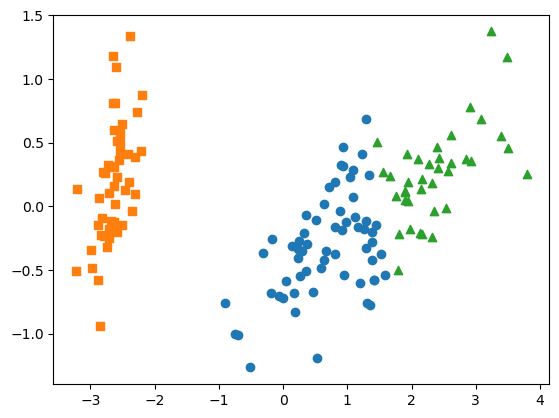

In [9]:
# 군집 값이 0,1,2 인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집값 0,1,2 에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출. o,s,^로 마커
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'],marker='^')

Clustering 알고리즘 테스트를 위한 데이터 생성

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 200개의 레코드와, 2개의 피쳐가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와
# 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환됩니다.
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts) # 군집이 골고루 잘 나뉘어 짐
# 3개의 cluster 값은 0,1,2이며, 각각 67,67,66개로 균일하게 구성되어 있다.

#"blobs"라는 용어는 
# 비유적으로 비슷하거나 관련된 데이터 포인트의 군집 또는 그룹을 설명하는 데 사용됩니다. 
# make_blobs 함수는 무작위 데이터 포인트를 생성하여 덩어리 또는 군집과 유사한 형태로 그룹화합니다.

(200, 2) (200,)
[0 1 2] [67 67 66]


In [13]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


[0 1 2]


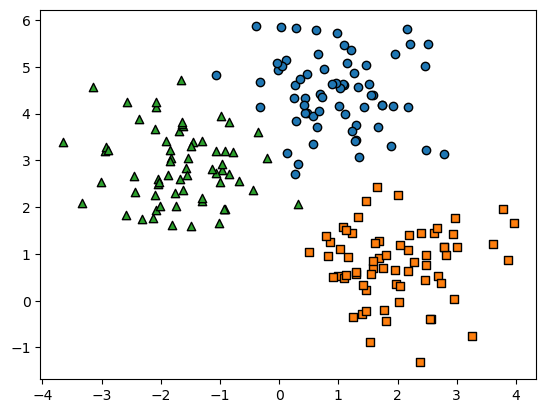

In [30]:
target_list = np.unique(y)
print(target_list)

markers = ['o','s','^']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 0,1,2
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y= target_cluster['ftr2'], edgecolor='k',
               marker=markers[target])
    
plt.show()

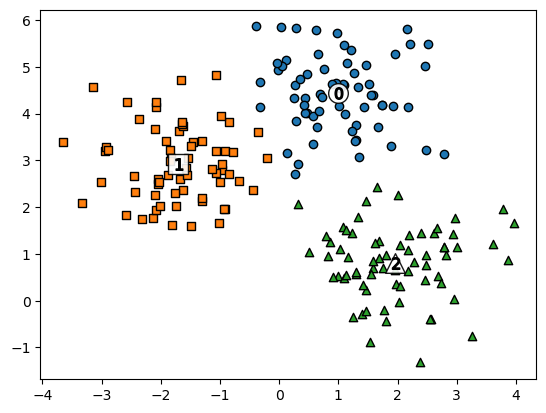

In [29]:
# kmeans 객체를 이용하여 X 데이터를 kmeans 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels= kmeans.fit_predict(X) # 군집이 잘 됐는지 비교. 매칭을 하지는 않음(0,1,2 그대로 하는 건 아님)

clusterDF['kmeans_label']=cluster_labels

centers = kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
               alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
               edgecolor='k', marker='$%d$'%label)
plt.show()
